In [1]:
#Libraries import 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
#Part 1

In [3]:
# Define the functions
def cube(x):
    return x**3

def module(x):
    return abs(x-0.2)

def sine(x): 
    return x*np.sin(1/x)

In [4]:
#Excaustive search optimization
def excaustive(func,a,b):
    l = []
    iterations = 0
    for k in range(1001):
        iterations+=1
        l.append(func(a+k*b/1000))
    return (min(l),iterations,len(l))

In [5]:
def print_res(result):
    print('function min value:', result[0], ' iterations:', result[1], ' f-calculations:', result[2])

In [6]:
#Results
a = excaustive(cube,0,1)
b = excaustive(module,0,1)
c = excaustive(sine,0.01,1)
print_res(a)
print_res(b)
print_res(c)

function min value: 0.0  iterations: 1001  f-calculations: 1001
function min value: 0.0  iterations: 1001  f-calculations: 1001
function min value: -0.21722461258083445  iterations: 1001  f-calculations: 1001


In [7]:
#Dichotomy search optimixatin
def dichotomy(func,a,b):
    delta = 0.0009
    iterations = 0
    calc = 0
    while abs(a-b)>=0.001:
        iterations+=1
        calc+=2
        x1 = (a+b-delta)/2
        x2 = (a+b+delta)/2
        if func(x1)<=func(x2):
            b = x2
        else:
            a = x1
    return (func((a+b)/2),iterations,calc+1)

In [8]:
a = dichotomy(cube,0,1)
b = dichotomy(module,0,1)
c = dichotomy(sine,0.01,1)
print_res(a)
print_res(b)
print_res(c)

function min value: 1.1093111164523245e-10  iterations: 14  f-calculations: 29
function min value: 7.785034179669248e-06  iterations: 14  f-calculations: 29
function min value: -0.2172336224666543  iterations: 14  f-calculations: 29


In [9]:
#Golden section ratio optimization
def golden_section(func,a,b):
    iterations = 0
    calc = 0
    x1 = a+(3-np.sqrt(5))/2 * (b-a)
    x2 = b-(3-np.sqrt(5))/2 * (b-a)
    A = func(x1)
    B = func(x2)
    while abs(a-b)>=0.001:
        iterations+=1
        calc+=1
        if A<=B:
            b = x2
            B=A
            x2 = x1
            x1 = a+(3-np.sqrt(5))/2 * (b-a)
            A = func(x1)
        else:
            a = x1
            A=B
            x1 = x2
            x2 =b-(3-np.sqrt(5))/2 * (b-a)
            B = func(x2)
        
        
    return (func((a+b)/2),iterations,calc+3)

In [10]:
a = golden_section(cube,0,1)
b = golden_section(module,0,1)
c = golden_section(sine,0.01,1)
print_res(a)
print_res(b)
print_res(c)

function min value: 4.9256800857728296e-11  iterations: 15  f-calculations: 18
function min value: 7.331374358568454e-05  iterations: 15  f-calculations: 18
function min value: -0.21723232817753246  iterations: 15  f-calculations: 18


In [11]:
#Part 2

In [19]:
# Generate noisy data
def generate_noisy_data(alpha, beta):
    x = np.linspace(0, 1, 101)  # x_k values
    delta = np.random.normal(0, 1, 101)  # Adjusted noise factor
    y = alpha * x + beta + delta
    return x, y

def generate_noisy_data_changed(alpha, beta):
    x = np.linspace(0, 1, 101)  # x_k values
    delta = np.random.normal(0, 0.1, 101)  # Adjusted noise factor
    y = alpha * x + beta + delta
    return x, y

# Linear approximant function
def linear_approximant(x, a, b):
    return a * x + b

# Rational approximant function
def rational_approximant(x, a, b):
    return a / (1 + b * x)

# Least squares function to minimize
def least_squares(params, x, y, approximant_func):
    a, b = params
    y_pred = approximant_func(x, a, b)
    return np.sum((y_pred - y) ** 2)

# Exhaustive search for parameter estimation
def exhaustive_search(approximant_func, x, y):
    result=[]
    best_loss = float('inf')
    best_params = None
    iterations = 0
    f_calculations = 0

    # Iterate through possible parameter values
    for a in np.linspace(-10, 10, 100):
        for b in np.linspace(-10, 10, 100):
            loss = least_squares([a, b], x, y, approximant_func)
            iterations+=1
            f_calculations+=1
            if loss < best_loss:
                best_loss = loss
                best_params = [a, b]
    return best_params, best_loss, iterations, f_calculations

# Gauss optimization for parameter estimation
def gauss_optimization(approximant_func, x, y):
    result = minimize(least_squares, [0, 0], args=(x, y, approximant_func), method='L-BFGS-B')
    return result.x, result.fun, result['nit'], result['nfev']

# Nelder-Mead optimization for parameter estimation
def nelder_mead_optimization(approximant_func, x, y):
    result = minimize(least_squares, [0, 0], args=(x, y, approximant_func), method='Nelder-Mead')
    return result.x, result.fun, result['nit'], result['nfev']

# Visualize data and approximants
def plot_results(x, y, approximant_func, params, title):
    plt.scatter(x, y, label='Noisy Data')
    x_values = np.linspace(0, 1, 1000)
    y_pred = approximant_func(x_values, *params)
    plt.plot(x_values, y_pred, label=f'Approximant: {title}', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()

    plt.xlim(-0.1, 1.1)
    plt.ylim(np.min(y) - 0.5, np.max(y) + 0.5)

    plt.show()

In [30]:
# Generate random alpha and beta
alpha = np.random.rand()
beta = np.random.rand()
print('alpha:', alpha)
print('beta:', beta)

# Generate noisy data
x, y = generate_noisy_data_changed(alpha, beta) #N(0, 0.1)
x2, y2 = generate_noisy_data(alpha, beta) #N(0, 1)

alpha: 0.5720703613982101
beta: 0.11155809850959031


In [31]:
#Graphs with N(0,0.1) delta coefficient

In [32]:
iterations = 0
f_calculations = 0

# Linear approximant
linear_params_exhaustive = exhaustive_search(linear_approximant, x, y)
print('Linear Approximant (Exhaustive):', 'iterations:',linear_params_exhaustive[2], '; f_calculations:', linear_params_exhaustive[3])

linear_params_gauss = gauss_optimization(linear_approximant, x, y)
print('Linear Approximant (Gauss):', 'iterations:',linear_params_gauss[2], '; f_calculations:', linear_params_gauss[3])

linear_params_nelder_mead = nelder_mead_optimization(linear_approximant, x, y)
print('Linear Approximant (Nelder-Mead):', 'iterations:',linear_params_nelder_mead[2], '; f_calculations:', linear_params_nelder_mead[3])

# Rational approximant
rational_params_exhaustive = exhaustive_search(rational_approximant, x, y)
print('Rational Approximant (Exhaustive):', 'iterations:',rational_params_exhaustive[2], '; f_calculations:', rational_params_exhaustive[3])

rational_params_gauss = gauss_optimization(rational_approximant, x, y)
print('Rational Approximant (Gauss):', 'iterations:',rational_params_gauss[2], '; f_calculations:', rational_params_gauss[3])

rational_params_nelder_mead = nelder_mead_optimization(rational_approximant, x, y)
print('Rational Approximant (Nelder-Mead):', 'iterations:',rational_params_nelder_mead[2], '; f_calculations:', rational_params_nelder_mead[3])


Linear Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Linear Approximant (Gauss): iterations: 3 ; f_calculations: 18
Linear Approximant (Nelder-Mead): iterations: 59 ; f_calculations: 117
Rational Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Rational Approximant (Gauss): iterations: 10 ; f_calculations: 54
Rational Approximant (Nelder-Mead): iterations: 59 ; f_calculations: 113


C:\Users\alika\AppData\Local\Temp\ipykernel_8016\702194644.py:20: RuntimeWarning: divide by zero encountered in divide
  return a / (1 + b * x)


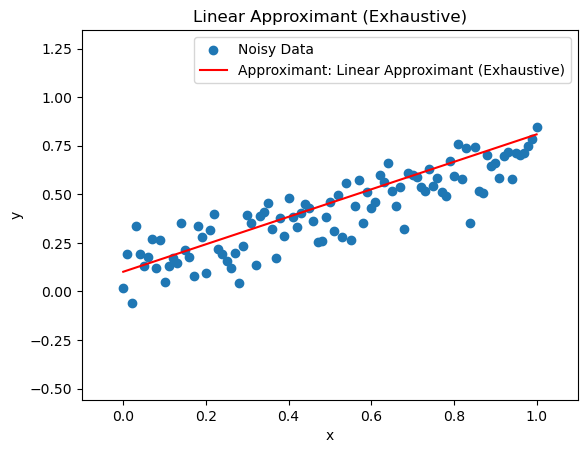

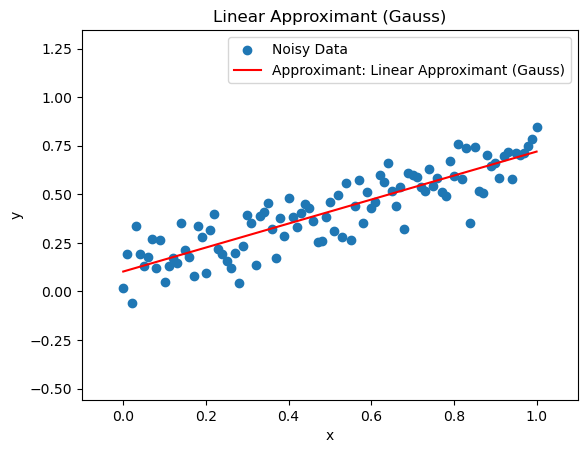

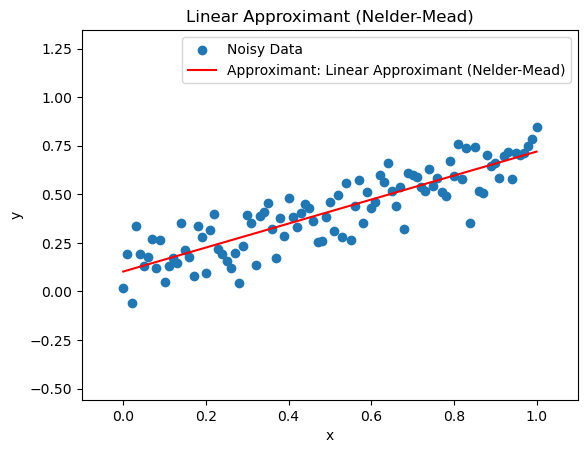

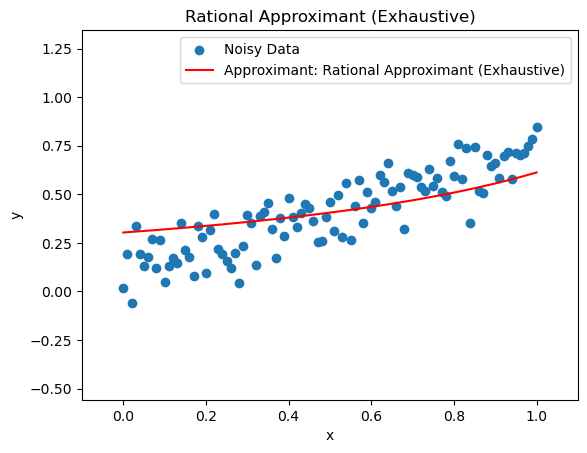

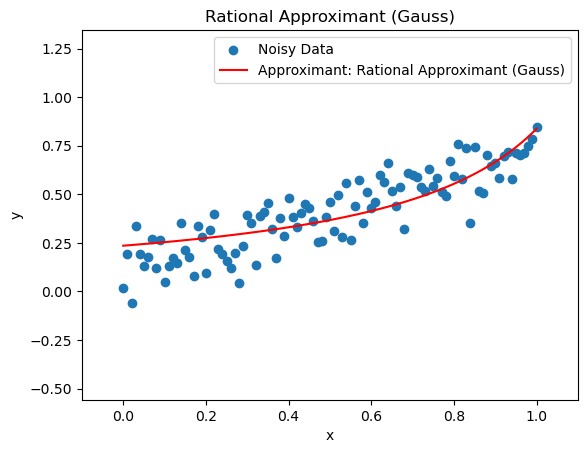

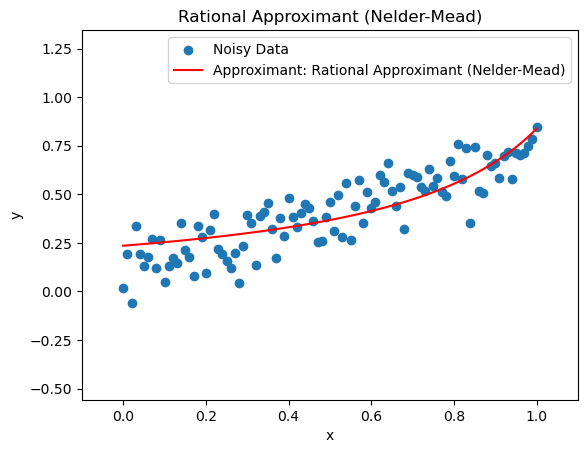

In [33]:
# Plot results for linear approximant
plot_results(x, y, linear_approximant, linear_params_exhaustive[0], 'Linear Approximant (Exhaustive)')
plot_results(x, y, linear_approximant, linear_params_gauss[0], 'Linear Approximant (Gauss)')
plot_results(x, y, linear_approximant, linear_params_nelder_mead[0], 'Linear Approximant (Nelder-Mead)')

# Plot results for rational approximant
plot_results(x, y, rational_approximant, rational_params_exhaustive[0], 'Rational Approximant (Exhaustive)')
plot_results(x, y, rational_approximant, rational_params_gauss[0], 'Rational Approximant (Gauss)')
plot_results(x, y, rational_approximant, rational_params_nelder_mead[0], 'Rational Approximant (Nelder-Mead)')

In [24]:
#Graphs with N(0,1) delta coefficient

In [34]:
iterations = 0
f_calculations = 0

# Linear approximant
linear_params_exhaustive = exhaustive_search(linear_approximant, x2, y2)
print('Linear Approximant (Exhaustive):', 'iterations:',linear_params_exhaustive[2], '; f_calculations:', linear_params_exhaustive[3])

linear_params_gauss = gauss_optimization(linear_approximant, x2, y2)
print('Linear Approximant (Gauss):', 'iterations:',linear_params_gauss[2], '; f_calculations:', linear_params_gauss[3])

linear_params_nelder_mead = nelder_mead_optimization(linear_approximant, x2, y2)
print('Linear Approximant (Nelder-Mead):', 'iterations:',linear_params_nelder_mead[2], '; f_calculations:', linear_params_nelder_mead[3])

# Rational approximant
rational_params_exhaustive = exhaustive_search(rational_approximant, x2, y2)
print('Rational Approximant (Exhaustive):', 'iterations:',rational_params_exhaustive[2], '; f_calculations:', rational_params_exhaustive[3])

rational_params_gauss = gauss_optimization(rational_approximant, x2, y2)
print('Rational Approximant (Gauss):', 'iterations:',rational_params_gauss[2], '; f_calculations:', rational_params_gauss[3])

rational_params_nelder_mead = nelder_mead_optimization(rational_approximant, x2, y2)
print('Rational Approximant (Nelder-Mead):', 'iterations:',rational_params_nelder_mead[2], '; f_calculations:', rational_params_nelder_mead[3])


Linear Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Linear Approximant (Gauss): iterations: 3 ; f_calculations: 18
Linear Approximant (Nelder-Mead): iterations: 66 ; f_calculations: 131
Rational Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Rational Approximant (Gauss): iterations: 10 ; f_calculations: 60
Rational Approximant (Nelder-Mead): iterations: 58 ; f_calculations: 110


C:\Users\alika\AppData\Local\Temp\ipykernel_8016\702194644.py:20: RuntimeWarning: divide by zero encountered in divide
  return a / (1 + b * x)


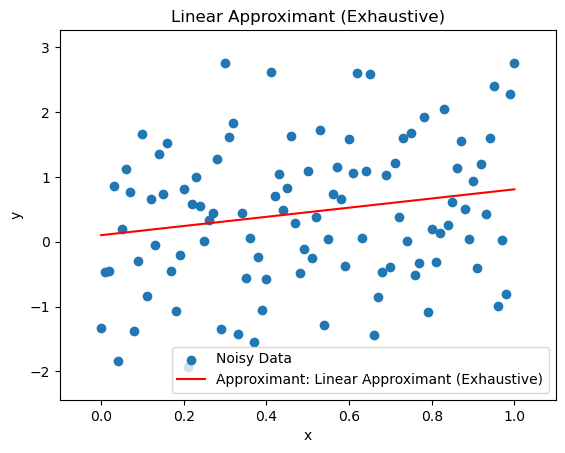

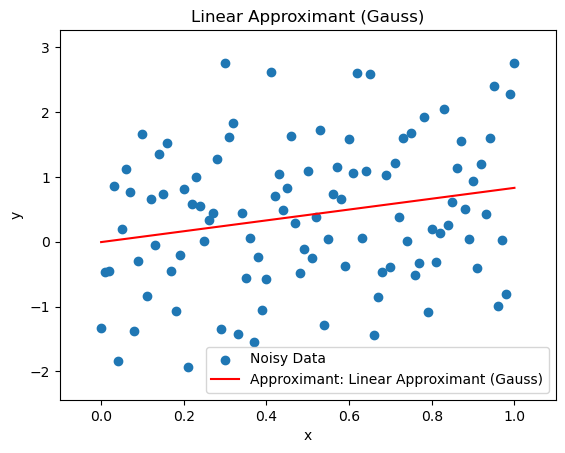

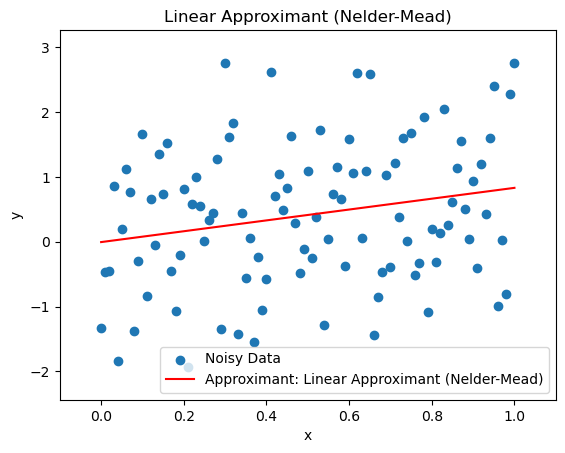

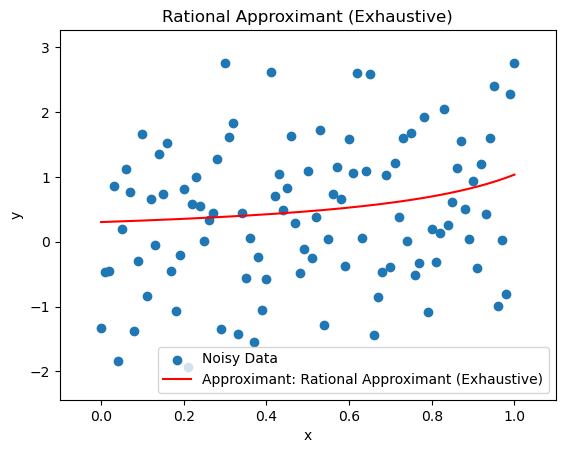

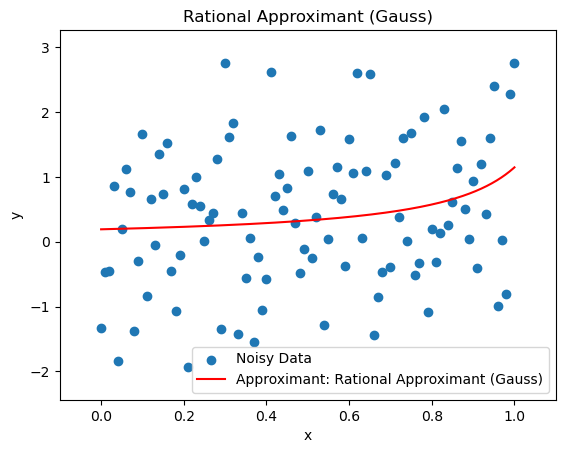

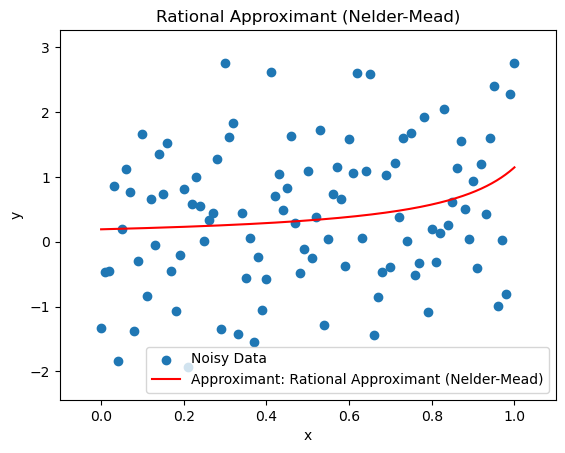

In [35]:
# Plot results for linear approximant
plot_results(x2, y2, linear_approximant, linear_params_exhaustive[0], 'Linear Approximant (Exhaustive)')
plot_results(x2, y2, linear_approximant, linear_params_gauss[0], 'Linear Approximant (Gauss)')
plot_results(x2, y2, linear_approximant, linear_params_nelder_mead[0], 'Linear Approximant (Nelder-Mead)')

# Plot results for rational approximant
plot_results(x2, y2, rational_approximant, rational_params_exhaustive[0], 'Rational Approximant (Exhaustive)')
plot_results(x2, y2, rational_approximant, rational_params_gauss[0], 'Rational Approximant (Gauss)')
plot_results(x2, y2, rational_approximant, rational_params_nelder_mead[0], 'Rational Approximant (Nelder-Mead)')

In [ ]:
#Graphs with N(0, 0.1) delta coefficient in one figure 

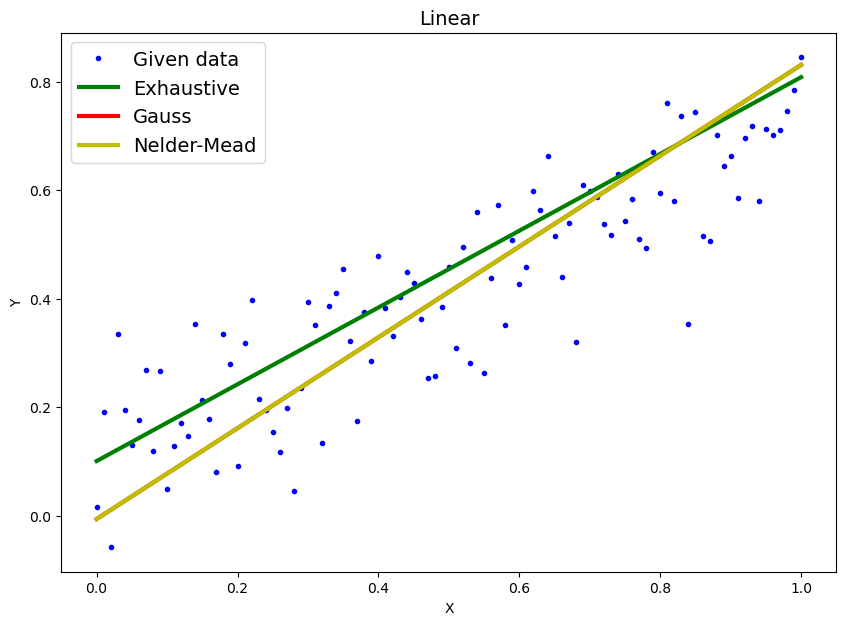

In [38]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_exhaustive[0]), 'g', label="Exhaustive", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_gauss[0]), 'r', label="Gauss", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_nelder_mead[0]), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)

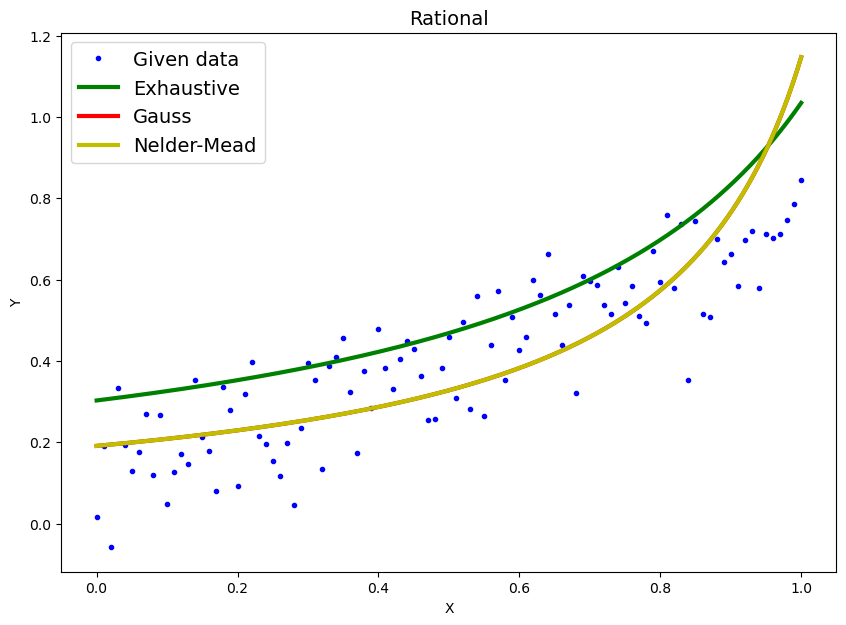

In [40]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_exhaustive[0]), 'g', label="Exhaustive", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_gauss[0]), 'r', label="Gauss", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_nelder_mead[0]), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)
